In [1]:
import pandas as pd

# membaca file csv menggunakan pandas
df = pd.read_csv( '/content/drive/MyDrive/Praktikum7/data/apples_and_oranges.csv')

# cetak header data (5 baris data) dari file
df.head()


,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [4]:
# Menampilkan nilai unik pada kolom 'Class'
unique_species = df["Class"].unique()
print("Jenis bunga yang ada di dataset:")
print(unique_species)
print("====================================")

# Menghitung jumlah data pada setiap jenis bunga
species_count = df["Class"].value_counts()
print("Jumlah data setiap jenis bunga:")
print(species_count)

Jenis bunga yang ada di dataset:
['orange' 'apple']
Jumlah data setiap jenis bunga:
Class
orange    20
apple     20
Name: count, dtype: int64


In [5]:
# Kolom fitur (fitur input)
X = df[['Weight', 'Size']]

# Kolom target (label)
y = df['Class']

In [6]:
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [7]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Bagi dataset jadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')

# Melatih model dengan data training
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix:
 [[3 0]
 [0 5]]


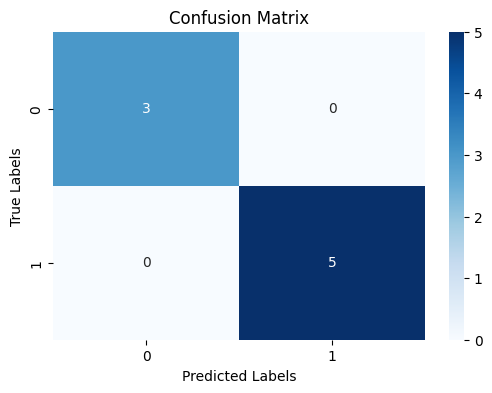

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan confusion matrix dalam bentuk array
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Jika kamu tahu nama kelas (opsional, agar lebih informatif)
# contoh:
# class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# lalu tambahkan di heatmap:
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=class_names, yticklabels=class_names)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

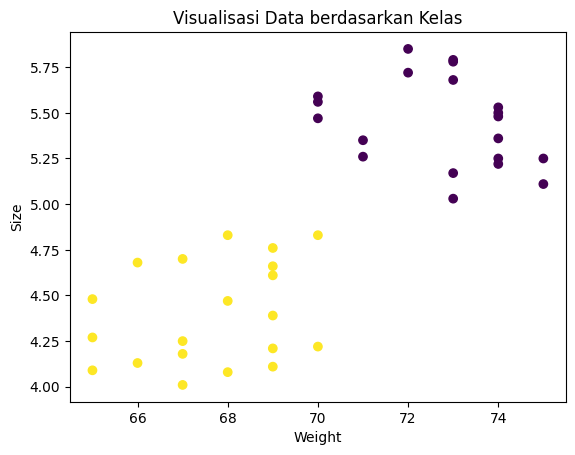

In [11]:
import matplotlib.pyplot as plt

plt.scatter(
    df['Weight'],
    df['Size'],
    c=df['Class'].astype('category').cat.codes
)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Visualisasi Data berdasarkan Kelas')
plt.show()

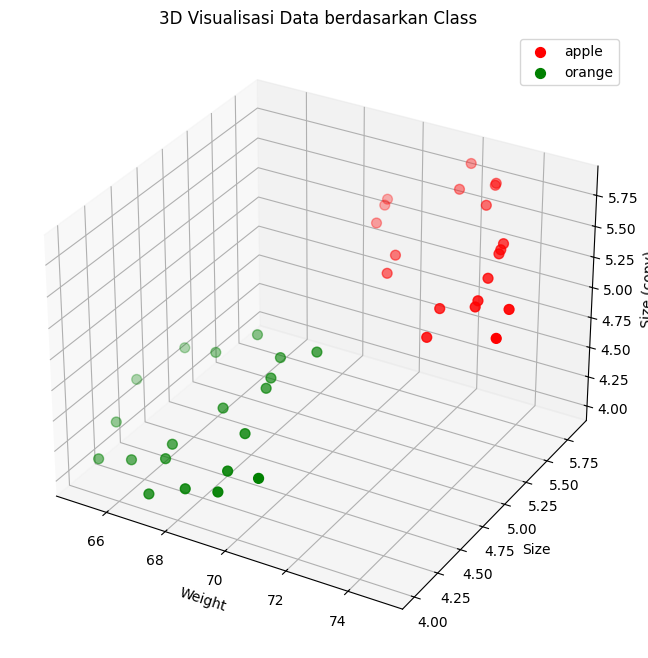

In [12]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['ClassEncoded'] = le.fit_transform(df['Class'])

# Plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# Plot tiap kelas
for i, cls in enumerate(labels):
    subset = df[df['ClassEncoded'] == i]
    ax.scatter(
        subset['Weight'],
        subset['Size'],
        subset['Size'],  # duplikat agar bisa divisualisasikan 3D
        color=colors[i % len(colors)],
        label=cls,
        s=50
    )

# Label sumbu
ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_zlabel('Size (copy)')
ax.set_title('3D Visualisasi Data berdasarkan Class')
ax.legend()
plt.show()